In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [27]:
data_frame = pd.read_csv("dataset/electricity.csv")
data_frame.drop(columns=["date", "OT"], inplace=True)
data_frame

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,199.0,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0
1,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,265.0,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0
2,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,278.0,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0
3,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,271.0,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0
4,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,267.0,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,11.0,116.0,8.0,844.0,384.0,1590.0,51.0,1412.0,407.0,351.0,...,178.0,1897.0,1589.0,166500.0,9917.0,10412.0,324.0,21.0,1870.0,162.0
26300,11.0,103.0,8.0,749.0,371.0,1366.0,47.0,1265.0,369.0,327.0,...,241.0,1374.0,1336.0,158800.0,6812.0,8956.0,302.0,20.0,1506.0,438.0
26301,12.0,93.0,8.0,650.0,346.0,1282.0,48.0,1079.0,308.0,283.0,...,158.0,938.0,1311.0,154300.0,6602.0,5910.0,302.0,18.0,1864.0,621.0
26302,10.0,92.0,8.0,646.0,349.0,1261.0,48.0,1009.0,288.0,292.0,...,120.0,833.0,1227.0,141900.0,6546.0,5502.0,259.0,33.0,2623.0,783.0


In [28]:
X: torch.Tensor = torch.tensor(data_frame.to_numpy()).float()
scaler = StandardScaler()
scaler.fit(X)
X: torch.Tensor = torch.tensor(scaler.transform(X))
X

tensor([[-0.3840, -1.7175,  4.4151,  ..., -0.3624, -1.2951, -1.2153],
        [-0.2182, -0.8174,  6.0008,  ..., -0.1206, -0.1599, -0.9498],
        [-0.0938, -0.6608,  6.0008,  ..., -0.2281, -0.1306, -1.0806],
        ...,
        [-0.4669, -0.7782, -0.1793,  ..., -0.8996, -0.7339,  0.4262],
        [-0.5498, -0.8174, -0.1793,  ..., -0.4967,  0.6580,  1.0320],
        [-0.5083, -0.9739, -0.1793,  ..., -0.5504,  0.8103,  0.5234]],
       dtype=torch.float64)

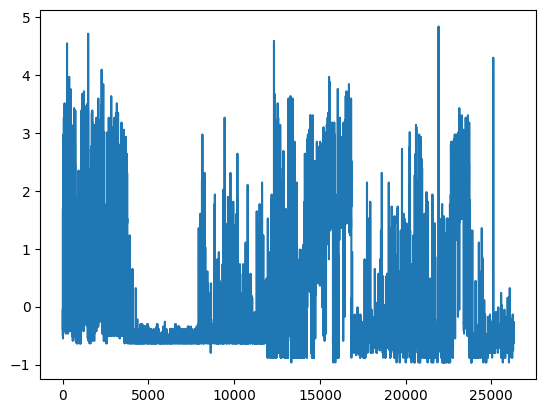

In [30]:
plt.plot(X[:,0])

In [35]:
X = X.permute(1, 0)
kernel_size = 25
padding1 = (kernel_size - 1) // 2
padding2 = (kernel_size - 1) - padding1
padding = nn.ReplicationPad1d(padding=(padding1, padding2))
avgpool = nn.AvgPool1d(kernel_size=kernel_size, stride=1)
T: torch.Tensor = avgpool(padding(X))
S: torch.Tensor = X - T
T = T.permute(1, 0)
S = S.permute(1, 0)
X = X.permute(1, 0)

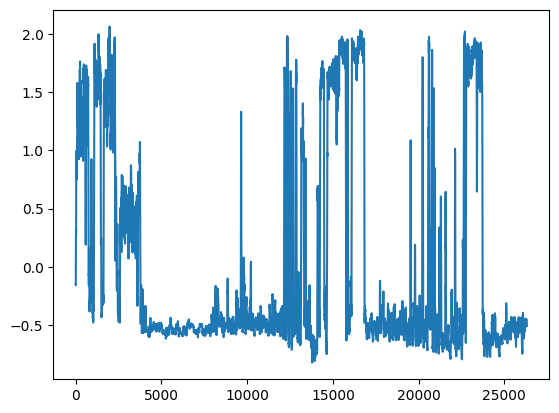

In [41]:
plt.plot(T[:, 0])

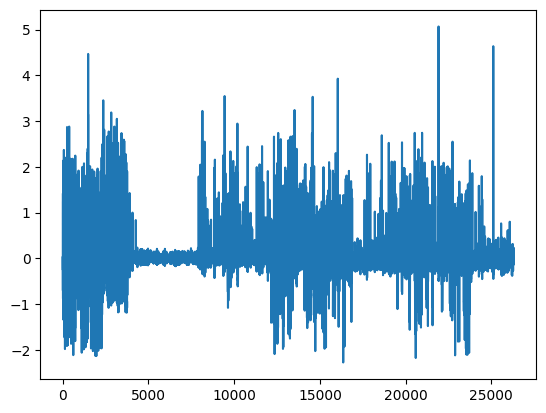

In [42]:
plt.plot(S[:, 0])

torch.return_types.topk(
values=tensor([1042.1619,  978.9344,  916.3793], dtype=torch.float64),
indices=tensor([1099, 1094, 2192]))

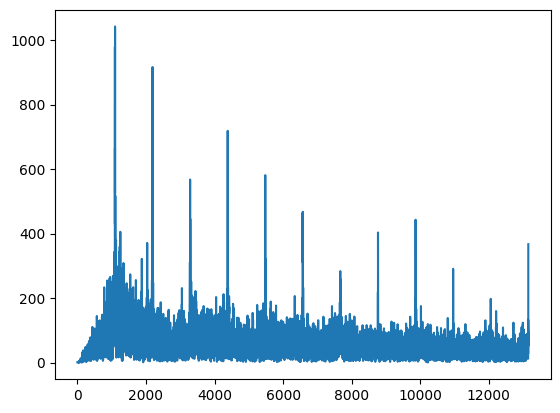

In [55]:
a = torch.abs(torch.fft.rfft(S[:, 0]))
plt.plot(a)
torch.topk(a, k=3)